## **Defi EGC 2024**

### **Table of contents**
1. Introduction
2. Loading the data
3. Analysis
4. Conclusion

### **1. Introduction**

One of the key features of bitcoin is its decentralized nature, meaning that it is not controlled by any government or financial institution. Instead, it uses a public ledger called the blockchain, which records all transactions and ensures that they are secure and irreversible.

Bitcoins are stored in a digital wallet, and can be bought and sold on exchanges or through peer-to-peer transactions. Transactions are verified through a process called mining, where powerful computers solve complex mathematical problems to validate transactions and earn new bitcoins in return.

Overall, bitcoin has gained popularity as a digital currency and a speculative investment, with its value fluctuating widely over time. This is why we are going to look at the variation of bitcoin during the whole year, to see if the price of bitcoins increases during specific events or on specific days of the week to know when to invest and when not to invest.

### **2. Loading the data**

#### **2.1 Imports**

In [1]:
# Import of necessary libraries
%matplotlib inline

import pandas as pd

import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

pd.options.plotting.backend = "plotly"

#### **2.2 Importing the data**

In [2]:
external_df = pd.read_csv('data/timeseries/external.csv')
global_df = pd.read_csv('data/timeseries/global.csv', index_col=0)
blockchain_by_actor_df = pd.read_csv('data/timeseries/blockchain_by_actor.csv', index_col=0)
transaction_network_df = pd.read_csv('data/networks/2015-1-1.csv')

We are here showing all the data that is available to us in order to see what we are working with.

In [3]:
blockchain_by_actor_df.head()

,year,month,day,identity,received,nb_received,date,sum_fee,mean_fee_for100,nb_transactions,sent,self_spent,self_spent_estimated,nb_spent,spent
0,2015.0,1.0,1.0,HappyCoins.com,1.377590e+09,4.0,2015-01-01,49596.0,0.004957,4.0,1.277500e+09,0.0,0.0,8.0,1.277500e+09
1,2015.0,1.0,1.0,821,2.476057e+09,5.0,2015-01-01,10000.0,0.000851,1.0,1.174552e+09,0.0,0.0,2.0,1.174552e+09
2,2015.0,1.0,1.0,FortuneJack.com,1.201470e+08,29.0,2015-01-01,83000.0,0.194670,11.0,1.541127e+08,14158970.0,14158970.0,22.0,1.399538e+08
3,2015.0,1.0,1.0,396,1.906135e+10,70.0,2015-01-01,540000.0,0.023738,54.0,1.842989e+10,0.0,0.0,108.0,1.842989e+10
4,2015.0,1.0,1.0,SatoshiMines.com,7.401319e+08,193.0,2015-01-01,740000.0,0.447934,45.0,1.813624e+09,35044568.0,35044568.0,84.0,1.778579e+09


In [4]:
external_df.head()

,Unnamed: 0,date,PriceUSD,HashRate
0,2190,2015-01-02,315.942732,333345.017260
1,2191,2015-01-03,285.647310,327284.198765
2,2192,2015-01-04,263.334575,347486.927083
3,2193,2015-01-05,275.003852,315162.561773
4,2194,2015-01-06,287.549521,319203.107437


In [5]:
global_df.head()

,year,month,day,total_fee,total_received_satoshi,total_sent_satoshi,mean_fee_satoshi,mean_feeUSD,mean_fee_for100,nb_transactions,nb_payments,mean_nb_inputs,mean_nb_outputs,nb_mining,total_mining_satoshi,newly_created_coins,self_spent_satoshi,total_received,volume_without_self
2015-01-01,2015,1,1,801373971,45473028339385,45058028339385,13609.829337,4.284054e+06,0.799999,58882,161194,2.595241,2.737577,166,415801373971,415000000000,2757774885900,45473028339385,42715253453485
2015-01-02,2015,1,2,1159934218,73370568521080,72955568521080,14978.682808,4.732406e+06,0.778933,77439,257633,2.715557,3.326915,166,416159934218,415000000000,4316724676318,73370568521080,69053843844762
2015-01-03,2015,1,3,1196476043,82635189454578,82220189454578,14304.385766,4.086009e+06,0.797419,83644,295618,2.781885,3.534240,166,416196476043,415000000000,5584584356557,82635189454578,77050605098021
2015-01-04,2015,1,4,2159195328,115159442449532,114726942449532,25138.199015,6.619757e+06,0.899054,85893,280288,2.770133,3.263223,173,434659195328,432500000000,6554587956125,115159442449532,108604854493407
2015-01-05,2015,1,5,1608443040,112439228285641,112051728285641,16955.609622,4.662858e+06,0.898594,94862,286552,2.954471,3.020725,155,389108443040,387500000000,5063695492444,112439228285641,107375532793197


In [6]:
print("Types of variables in different timeseries\n\nBlockchain by actors :")
print(blockchain_by_actor_df.dtypes)
print("\nExternal :")
print(external_df.dtypes)
print("\nGlobal :")
print(global_df.dtypes)

Types of variables in different timeseries

Blockchain by actors :
year                    float64
month                   float64
day                     float64
identity                 object
received                float64
nb_received             float64
date                     object
sum_fee                 float64
mean_fee_for100         float64
nb_transactions         float64
sent                    float64
self_spent              float64
self_spent_estimated    float64
nb_spent                float64
spent                   float64
dtype: object

External :
Unnamed: 0      int64
date           object
PriceUSD      float64
HashRate      float64
dtype: object

Global :
year                        int64
month                       int64
day                         int64
total_fee                   int64
total_received_satoshi      int64
total_sent_satoshi          int64
mean_fee_satoshi          float64
mean_feeUSD               float64
mean_fee_for100           float64
nb_transa

In [7]:
# create date column in global_df base on year month and day colums
global_df['date'] = global_df['year'].astype(str) + '-' + global_df['month'].astype(str) + '-' + global_df['day'].astype(str)
global_df['date'] = pd.to_datetime(global_df['date'])
external_df['date'] = pd.to_datetime(external_df['date'])

def graph_external_with_date(column_name, display_name):
    plt.plot(external_df['date'], external_df[column_name])
    plt.xlabel('Date')
    plt.xticks(rotation=90)
    plt.ylabel(display_name)
    plt.show()

## **3. Analysis**

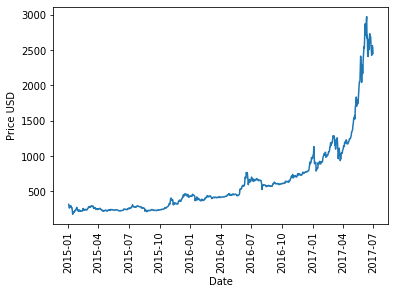

In [8]:
graph_external_with_date('PriceUSD', 'Price USD')

In [9]:
def find_all_margins_with_dates(prices, dates):
    margins = [(100 * (prices[i] - prices[i-1]) / prices[i-1], dates[i], dates[i].strftime('%A')) for i in range(1, len(prices))]
    margins_sorted = sorted(margins, key=lambda x: x[0], reverse=True)
    df = pd.DataFrame(margins_sorted, columns=['Margin', 'Date', 'DayOfWeek'])
    return df

In [10]:
margins = find_all_margins_with_dates(external_df['PriceUSD'], external_df['date'])
margins[:20]

,Margin,Date,DayOfWeek
0,20.897212,2015-01-15,Thursday
1,12.523943,2016-05-28,Saturday
2,11.228318,2016-01-20,Wednesday
3,10.726380,2016-06-12,Sunday
4,10.538716,2015-11-02,Monday
5,10.419915,2016-06-16,Thursday
6,10.405692,2017-05-08,Monday
7,9.957439,2015-11-03,Tuesday
8,9.866986,2017-01-04,Wednesday
9,9.258255,2015-11-12,Thursday


Based on the first 20 biggest margins, we cannot see any specific date or holidays that would increase the value of Bitcoin.

In [11]:
def calculate_mean_margin_by_day(df):
    return df.groupby('DayOfWeek')['Margin'].mean()

In [12]:
margins_with_dates = calculate_mean_margin_by_day(margins)
margins_with_dates.sort_values(ascending=False)

DayOfWeek
Thursday     0.736457
Monday       0.590760
Saturday     0.331597
Tuesday      0.262974
Friday       0.231857
Sunday       0.124790
Wednesday   -0.298131
Name: Margin, dtype: float64

In [13]:
margins_with_dates.plot()

Here, we can see the average margin for each day during the period of all the data that we have. We can see that the lowest margin usually takes place on wednesdays, which means that it would be the best day to invest, because it means that the value goes down on wednesdays, and then significantly goes up on thursdays.

In [14]:
external_df.set_index('date', inplace=True)

monthly_df = external_df.resample('M').agg({'PriceUSD': ['first', 'last']})

monthly_df['margin'] = monthly_df['PriceUSD', 'last'].diff()

monthly_df['pct_change'] = monthly_df['margin'] / monthly_df['PriceUSD', 'first'].shift(1)

avg_pct_change = monthly_df.groupby(pd.Grouper(freq='M')).mean()[['pct_change']]

avg_pct_change = avg_pct_change.round(2)

result_df = pd.DataFrame(avg_pct_change)
result_df.columns = ['average_pct_change']
result_df_sorted = result_df.sort_values('average_pct_change', ascending=False)

print(result_df_sorted[:20])

            average_pct_change
date                          
2017-05-31                0.84
2015-10-31                0.34
2016-06-30                0.32
2016-12-31                0.31
2015-11-30                0.27
2017-04-30                0.24
2017-02-28                0.22
2016-05-31                0.19
2016-10-31                0.16
2015-12-31                0.16
2016-02-29                0.16
2015-06-30                0.15
2015-02-28                0.12
2017-06-30                0.11
2015-07-31                0.09
2016-04-30                0.08
2016-11-30                0.07
2016-09-30                0.06
2015-09-30                0.02
2017-01-31               -0.00


In [15]:
result_df.plot()

As we can see here, it seems like each year around may and june, the value goes up, and during the winter, the value goes generaly down. It may be due to people spending more bitcoins during the summer, when enjoying their vacations, which creates a higher demand, and thus the value rises.

## **4. Conclusion**

Based on the analysis that we have done and the different results that we have got, it would seem like the best day to invest would be on wednesdays, and the best period on when to invest in bitcoin would be during the winter. 